# 1c

In [3]:
using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
p = 0.55
q = 0.55
P1 = 1:3
P2 = 1:3

@variables m begin
    x[P1] >= 0
    z
end

@constraints m begin 
    x[1] + x[2] + p*x[3] >= z
    (1-q)*x[1] + (1-q+p*q)*x[2] + (1-q+p*q)*x[3] >= z
    (1-q)*x[1] + (1-q)*x[2] + (1-q+p*q)*x[3] >= z
    sum(x[i] for i in P1) == 1
end

## INSERT OBJECTIVE BELOW
@objective(m, Max, z)

m

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-06


A JuMP Model
Maximization problem with:
Variables: 4
Objective function type: VariableRef
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 1 constraint
`AffExpr`-in-`MathOptInterface.GreaterThan{Float64}`: 3 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 3 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Gurobi
Names registered in the model: x, z

In [4]:
optimize!(m)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 4 columns and 15 nonzeros
Model fingerprint: 0xa5449466
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 3 rows, 4 columns, 11 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+00   7.988950e-01   0.000000e+00      0s
       2    6.7109635e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.00 seconds (0.00 work units)
Optimal objective  6.710963455e-01

User-callback calls 61, time in user-callback 0.01 sec


In [5]:
println(objective_value(m))
print(value.(x[P1]))

0.6710963455149502
1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, [1, 2, 3]
And data, a 3-element Vector{Float64}:
 0.0
 0.2691029900332226
 0.7308970099667774

# 1d

In [4]:
using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
p = 0.55
q = 0.55
P1 = 1:3
P2 = 1:3

@variables m begin
    y[P2] >= 0
    v
end

@constraints m begin 
    y[1] + (1-q)*y[2] + (1-q)*y[3] <= v
    y[1] + (1-q+p*q)*y[2] + (1-q)*y[3] <= v
    p*y[1] + (1-q+p*q)*y[2] + (1-q+p*q)*y[3] <= v
    sum(y[i] for i in P1) == 1
end

## INSERT OBJECTIVE BELOW
@objective(m, Min, v)

m

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-06


A JuMP Model
Minimization problem with:
Variables: 4
Objective function type: VariableRef
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 1 constraint
`AffExpr`-in-`MathOptInterface.LessThan{Float64}`: 3 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 3 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Gurobi
Names registered in the model: v, y

In [5]:
optimize!(m)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 4 columns and 15 nonzeros
Model fingerprint: 0x10859da6
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 3 rows, 4 columns, 9 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.5000000e-01   3.025000e-01   0.000000e+00      0s
       1    6.7109635e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds (0.00 work units)
Optimal objective  6.710963455e-01

User-callback calls 61, time in user-callback 0.00 sec


In [6]:
println(objective_value(m))
print(value.(y[P2]))

0.6710963455149501
1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, [1, 2, 3]
And data, a 3-element Vector{Float64}:
 0.40199335548172765
 0.0
 0.5980066445182723

# 3a

In [15]:
using JuMP, Gurobi

# Create dictionaries to store objective values and x[P1] values
objective_values = Dict{Float64, Float64}()
x_values = Dict{Float64, Vector{Float64}}()

P1 = 1:3
P2 = 1:3

q = 0.55

for p in 0.1:0.1:1.0
    m = Model(Gurobi.Optimizer)

    @variables m begin
        x[P1] >= 0
        z
    end

    @constraints m begin 
        x[1] + x[2] + p*x[3] >= z
        (1-q)*x[1] + (1-q+p*q)*x[2] + (1-q+p*q)*x[3] >= z
        (1-q)*x[1] + (1-q)*x[2] + (1-q+p*q)*x[3] >= z
        sum(x[i] for i in P1) == 1
    end

    @objective(m, Max, z)

    # Solve the model
    optimize!(m)

    # Store objective value
    objective_values[p] = objective_value(m)

    # Store x[P1] values
    x_values[p] = value.(x)
end

# Sort the dictionaries by keys
objective_values = sort(objective_values)
x_values = sort(x_values)


Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-06
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 4 columns and 15 nonzeros
Model fingerprint: 0xda5c7d65
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 3 rows, 4 columns, 11 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+00   1.046890e+00   0.000000e+00      0s
       2    4.8167539e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.00 seconds (0.00 work units)
Optimal objective  4.816753927e-01

User-callback calls 61, tim

OrderedCollections.OrderedDict{Float64, Vector{Float64}} with 10 entries:
  0.1 => [0.0, 0.424084, 0.575916]
  0.2 => [0.0, 0.395604, 0.604396]
  0.3 => [0.0, 0.364162, 0.635838]
  0.4 => [0.0, 0.329268, 0.670732]
  0.5 => [0.0, 0.290323, 0.709677]
  0.6 => [0.0, 0.246575, 0.753425]
  0.7 => [0.0, 0.19708, 0.80292]
  0.8 => [0.0, 0.140625, 0.859375]
  0.9 => [0.0, 0.0756303, 0.92437]
  1.0 => [0.0, 0.0, 1.0]

In [16]:
# Print objective values dictionary
println("Objective value dictionary:")
for (p, obj) in objective_values
    println("p = $p: Objective value = $obj")
end
println()

# Print x[P1] values dictionary
println("x[P1] values dictionary:")
for (p, x_val) in x_values
    println("p = $p: x[P1] = $x_val")
end

Objective value dictionary:
p = 0.1: Objective value = 0.481675392670157
p = 0.2: Objective value = 0.5164835164835164
p = 0.3: Objective value = 0.5549132947976878
p = 0.4: Objective value = 0.5975609756097562
p = 0.5: Objective value = 0.6451612903225806
p = 0.6: Objective value = 0.6986301369863014
p = 0.7: Objective value = 0.7591240875912408
p = 0.8: Objective value = 0.828125
p = 0.9: Objective value = 0.907563025210084
p = 1.0: Objective value = 1.0

x[P1] values dictionary:
p = 0.1: x[P1] = [0.0, 0.4240837696335078, 0.5759162303664922]
p = 0.2: x[P1] = [0.0, 0.39560439560439553, 0.6043956043956045]
p = 0.3: x[P1] = [0.0, 0.36416184971098264, 0.6358381502890174]
p = 0.4: x[P1] = [0.0, 0.3292682926829268, 0.6707317073170732]
p = 0.5: x[P1] = [0.0, 0.29032258064516125, 0.7096774193548387]
p = 0.6: x[P1] = [0.0, 0.2465753424657533, 0.7534246575342467]
p = 0.7: x[P1] = [0.0, 0.1970802919708029, 0.8029197080291971]
p = 0.8: x[P1] = [0.0, 0.140625, 0.859375]
p = 0.9: x[P1] = [0.0, 0.0

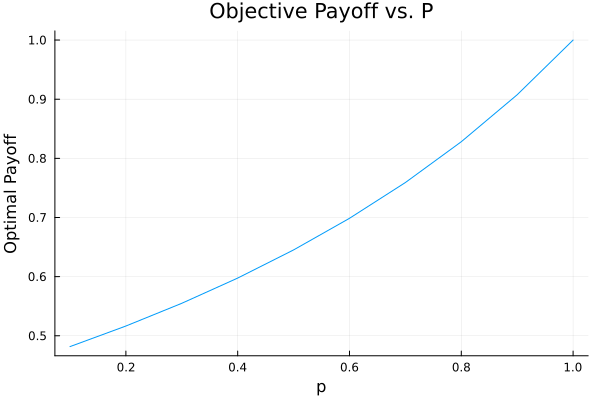

In [22]:
using Plots

# Initialize arrays to store keys and values
keys_values = Float64[]
values = Float64[]

# Extract keys and values from the objective_values dictionary using a for loop
for (key, value) in objective_values
    push!(keys_values, key)
    push!(values, value)
end

# Create the plot
plot(keys_values, values, xlabel="p", ylabel="Optimal Payoff", title="Objective Payoff vs. P", legend=false)

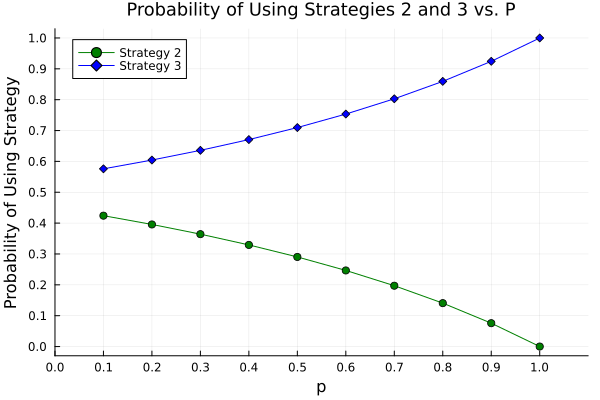

In [57]:
using Plots

# Get the p-values and corresponding probabilities for the second and third strategies
p_values = collect(keys(x_values))
strategy_values_2 = [x_values[p][2] for p in p_values]
strategy_values_3 = [x_values[p][3] for p in p_values]

# Initialize the plot
plot(p_values, strategy_values_2, label="Strategy 2", color=:green, marker=:circle)
plot!(p_values, strategy_values_3, label="Strategy 3", color=:blue, marker=:diamond)

# Add labels
xlabel!("p")
ylabel!("Probability of Using Strategy")
title!("Probability of Using Strategies 2 and 3 vs. P", titlefontsize=12)

# Set x-axis limits to range from 0 to slightly greater than 1
xlims!(0, 1.1)
# Set x-axis ticks to go by 0.1 increments
xticks!(0:0.1:1)
yticks!(0:0.1:1)

# Add legend
plot!(legend=:topleft, fontsize=8)

# Show the plot
plot!()

# 3b

In [7]:
using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
p = 0
q = 0.55
P1 = 1:3
P2 = 1:3

@variables m begin
    x[P1] >= 0
    z
end

@constraints m begin 
    x[1] + x[2] + p*x[3] >= z
    (1-q)*x[1] + (1-q+p*q)*x[2] + (1-q+p*q)*x[3] >= z
    (1-q)*x[1] + (1-q)*x[2] + (1-q+p*q)*x[3] >= z
    sum(x[i] for i in P1) == 1
end

## INSERT OBJECTIVE BELOW
@objective(m, Max, z)

m

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-06


A JuMP Model
Maximization problem with:
Variables: 4
Objective function type: VariableRef
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 1 constraint
`AffExpr`-in-`MathOptInterface.GreaterThan{Float64}`: 3 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 3 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Gurobi
Names registered in the model: x, z

In [8]:
optimize!(m)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 4 columns and 14 nonzeros
Model fingerprint: 0x5cba2938
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 4 rows and 4 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.5000000e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  4.500000000e-01

User-callback calls 58, time in user-callback 0.00 sec


In [9]:
println(objective_value(m))
print(value.(x[P2]))

0.44999999999999996
1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, [1, 2, 3]
And data, a 3-element Vector{Float64}:
 1.0
 0.0
 0.0

## 4a

In [ ]:
# Analysis 1

In [12]:
using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
p = 0.55
q = 0.55
P1 = 1:3
P2 = 1:3

@variables m begin
    x[P1] >= 0
    z
end

@constraints m begin 
    0*x[1]+ p*x[2] + p*x[3] >= z
    0*x[1]+ p*(1-q)*x[2] + p*x[3] >= z
    0*x[1]+ p*(1-q)*x[2] + p*(1-q)*x[3] >= z
    sum(x[i] for i in P1) == 1
end

## INSERT OBJECTIVE BELOW
@objective(m, Max, z)

m

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-06


A JuMP Model
Maximization problem with:
Variables: 4
Objective function type: VariableRef
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 1 constraint
`AffExpr`-in-`MathOptInterface.GreaterThan{Float64}`: 3 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 3 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Gurobi
Names registered in the model: x, z

In [13]:
optimize!(m)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 4 columns and 12 nonzeros
Model fingerprint: 0xa4fb7c43
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 4 rows and 4 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.4750000e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.475000000e-01

User-callback calls 49, time in user-callback 0.00 sec


In [14]:
println(objective_value(m))
print(value.(x[P1]))

0.2475
1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, [1, 2, 3]
And data, a 3-element Vector{Float64}:
 0.0
 0.0
 1.0

In [ ]:
#Analysis 2

In [15]:
using JuMP, Gurobi

# Create dictionaries to store objective values and x[P1] values
objective_values = Dict{Float64, Float64}()
x_values = Dict{Float64, Vector{Float64}}()

P1 = 1:3
P2 = 1:3

q = 0.55

for p in 0.1:0.1:1.0
    m = Model(Gurobi.Optimizer)

    @variables m begin
        x[P1] >= 0
        z
    end

    @constraints m begin 
        x[1] + x[2] + p*x[3] >= z
        (p)*x[1] + (2p-p^2)*x[2] + (2p-p^2)*x[3] >= z
        (p)*x[1] + (p)*x[2] + (2p-p^2)*x[3] >= z
        sum(x[i] for i in P1) == 1
    end

    @objective(m, Max, z)

    # Solve the model
    optimize!(m)

    # Store objective value
    objective_values[p] = objective_value(m)

    # Store x[P1] values
    x_values[p] = value.(x)
end

# Sort the dictionaries by keys
objective_values = sort(objective_values)
x_values = sort(x_values)


Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-06
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 4 columns and 15 nonzeros
Model fingerprint: 0x34901652
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 3 rows, 4 columns, 11 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+00   1.711820e+00   0.000000e+00      0s
       2    1.8181818e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.818181818e-01

User-callback calls 61, tim

OrderedCollections.OrderedDict{Float64, Vector{Float64}} with 10 entries:
  0.1 => [0.0, 0.0909091, 0.909091]
  0.2 => [0.0, 0.166667, 0.833333]
  0.3 => [0.0, 0.230769, 0.769231]
  0.4 => [0.0, 0.285714, 0.714286]
  0.5 => [0.0, 0.333333, 0.666667]
  0.6 => [0.0, 0.375, 0.625]
  0.7 => [0.0, 0.411765, 0.588235]
  0.8 => [0.0, 0.444444, 0.555556]
  0.9 => [0.0, 0.473684, 0.526316]
  1.0 => [1.0, 0.0, 0.0]

In [16]:
# Print objective values dictionary
println("Objective value dictionary:")
for (p, obj) in objective_values
    println("p = $p: Objective value = $obj")
end
println()

# Print x[P1] values dictionary
println("x[P1] values dictionary:")
for (p, x_val) in x_values
    println("p = $p: x[P1] = $x_val")
end

Objective value dictionary:
p = 0.1: Objective value = 0.18181818181818185
p = 0.2: Objective value = 0.3333333333333333
p = 0.3: Objective value = 0.46153846153846156
p = 0.4: Objective value = 0.5714285714285715
p = 0.5: Objective value = 0.6666666666666667
p = 0.6: Objective value = 0.75
p = 0.7: Objective value = 0.8235294117647058
p = 0.8: Objective value = 0.8888888888888888
p = 0.9: Objective value = 0.9473684210526316
p = 1.0: Objective value = 1.0

x[P1] values dictionary:
p = 0.1: x[P1] = [0.0, 0.09090909090909083, 0.9090909090909092]
p = 0.2: x[P1] = [0.0, 0.16666666666666663, 0.8333333333333334]
p = 0.3: x[P1] = [0.0, 0.23076923076923073, 0.7692307692307693]
p = 0.4: x[P1] = [0.0, 0.2857142857142857, 0.7142857142857143]
p = 0.5: x[P1] = [0.0, 0.33333333333333337, 0.6666666666666666]
p = 0.6: x[P1] = [0.0, 0.375, 0.625]
p = 0.7: x[P1] = [0.0, 0.4117647058823528, 0.5882352941176472]
p = 0.8: x[P1] = [0.0, 0.4444444444444444, 0.5555555555555556]
p = 0.9: x[P1] = [0.0, 0.473684

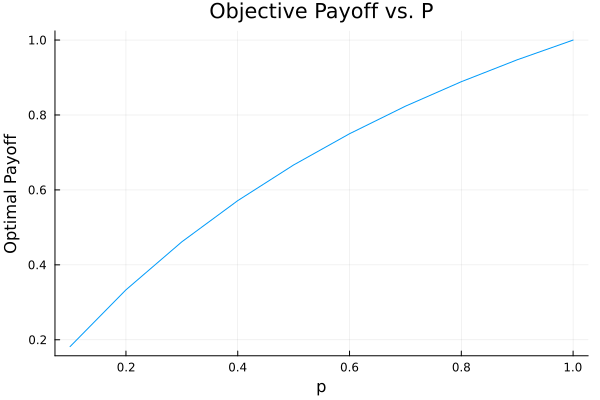

In [17]:
using Plots

# Initialize arrays to store keys and values
keys_values = Float64[]
values = Float64[]

# Extract keys and values from the objective_values dictionary using a for loop
for (key, value) in objective_values
    push!(keys_values, key)
    push!(values, value)
end

# Create the plot
plot(keys_values, values, xlabel="p", ylabel="Optimal Payoff", title="Objective Payoff vs. P", legend=false)

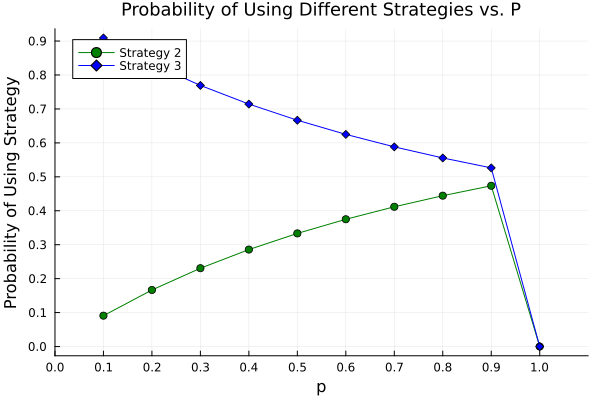

In [19]:
using Plots

# Get the p-values and corresponding probabilities for the second and third strategies
p_values = collect(keys(x_values))
strategy_values_1 = [x_values[p][1] for p in p_values]
strategy_values_2 = [x_values[p][2] for p in p_values]
strategy_values_3 = [x_values[p][3] for p in p_values]

# Initialize the plot
plot(p_values, strategy_values_1, label="Strategy 1", color=:red, marker=:square)
plot(p_values, strategy_values_2, label="Strategy 2", color=:green, marker=:circle)
plot!(p_values, strategy_values_3, label="Strategy 3", color=:blue, marker=:diamond)

# Add labels
xlabel!("p")
ylabel!("Probability of Using Strategy")
title!("Probability of Using Different Strategies vs. P", titlefontsize=12)

# Set x-axis limits to range from 0 to slightly greater than 1
xlims!(0, 1.1)
# Set x-axis ticks to go by 0.1 increments
xticks!(0:0.1:1)
yticks!(0:0.1:1)

# Add legend
plot!(legend=:topleft, fontsize=8)

# Show the plot
plot!()

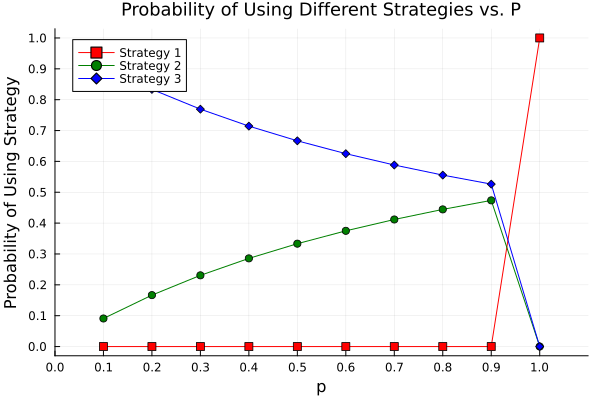

In [20]:
using Plots

# Get the p-values and corresponding probabilities for the second and third strategies
p_values = collect(keys(x_values))
strategy_values_1 = [x_values[p][1] for p in p_values]
strategy_values_2 = [x_values[p][2] for p in p_values]
strategy_values_3 = [x_values[p][3] for p in p_values]

# Initialize the plot
plot(p_values, strategy_values_1, label="Strategy 1", color=:red, marker=:square)
plot!(p_values, strategy_values_2, label="Strategy 2", color=:green, marker=:circle)
plot!(p_values, strategy_values_3, label="Strategy 3", color=:blue, marker=:diamond)

# Add labels
xlabel!("p")
ylabel!("Probability of Using Strategy")
title!("Probability of Using Different Strategies vs. P", titlefontsize=12)

# Set x-axis limits to range from 0 to slightly greater than 1
xlims!(0, 1.1)
# Set x-axis ticks to go by 0.1 increments
xticks!(0:0.1:1)
yticks!(0:0.1:1)

# Add legend
plot!(legend=:topleft, fontsize=8)

# Show the plot
plot!()